In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory

tf.config.list_physical_devices('GPU')

2024-03-12 23:45:23.981025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 23:45:23.981085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 23:45:23.983125: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 23:45:23.991927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 23:45:24.915249: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2024-03-12 23:45:25.879993: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 23:45:25.880180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [2]:
train_dir = '../Generator/dataset1/train'
test_dir = '../Generator/dataset1/test'

In [3]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

269


In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    label_mode='categorical',
    shuffle=True
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )


Found 3000 files belonging to 4 classes.


2024-03-12 23:45:31.122949: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 23:45:31.123209: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 23:45:31.123371: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 1000 files belonging to 4 classes.


In [ ]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.RandomCrop(IMG_SIZE, IMG_SIZE)
])

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [8]:
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
history = model.fit(train_dataset, epochs=20, batch_size=32)

Epoch 1/20


2024-03-12 23:48:30.181905: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-12 23:48:30.312101: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-12 23:48:37.391991: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ffa1089e080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-12 23:48:37.392431: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-03-12 23:48:37.400006: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710287317.451662  128222 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


94/94 [==============================] - 63s 474ms/step - loss: 1.4025 - acc: 0.2440
Epoch 2/20
94/94 [==============================] - 33s 344ms/step - loss: 1.3835 - acc: 0.2843
Epoch 3/20
94/94 [==============================] - 33s 352ms/step - loss: 1.3640 - acc: 0.3173
Epoch 4/20
94/94 [==============================] - 33s 348ms/step - loss: 1.3207 - acc: 0.3547
Epoch 5/20
94/94 [==============================] - 32s 340ms/step - loss: 1.2412 - acc: 0.4420
Epoch 6/20
94/94 [==============================] - 33s 343ms/step - loss: 1.1284 - acc: 0.5073
Epoch 7/20
94/94 [==============================] - 33s 346ms/step - loss: 1.0299 - acc: 0.5600
Epoch 8/20
94/94 [==============================] - 32s 341ms/step - loss: 0.9245 - acc: 0.6130
Epoch 9/20
94/94 [==============================] - 33s 351ms/step - loss: 0.8205 - acc: 0.6613
Epoch 10/20
94/94 [==============================] - 33s 345ms/step - loss: 0.7492 - acc: 0.6927
Epoch 11/20
94/94 [==============================]

In [22]:
model.save('models/shape_classifier.h5')

/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


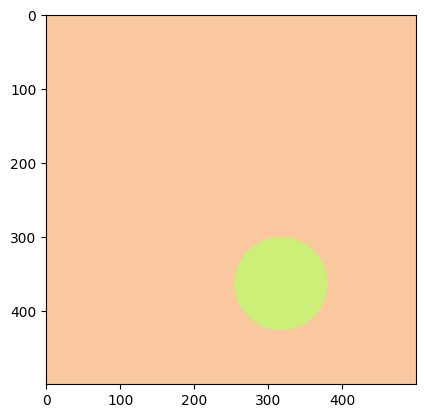

1/1 [==============================] - 0s 24ms/step
[[0. 0. 1. 0.]]


In [15]:
img = np.array([])
for data_batch, label in test_dataset.take(1):
        image = data_batch[random.randint(0,10)].numpy().astype("uint8")
        img = np.append(img, image)
        plt.imshow(image)
        plt.show()
        break
img = img.reshape(IMG_SIZE, IMG_SIZE, 3)
img.astype("float32") / 255
img = np.expand_dims(img, axis=0)

print(model.predict(img).round())

In [20]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

32/32 [==============================] - 4s 113ms/step - loss: 1.4310 - acc: 0.6240
1.4310349225997925 0.6240000128746033


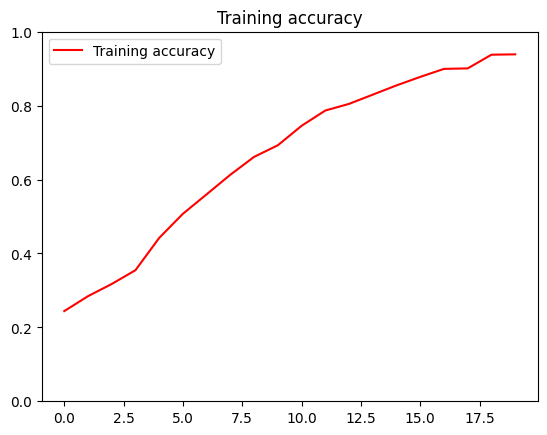

<Figure size 640x480 with 0 Axes>

In [18]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')

ax = plt.gca()
ax.set_ylim([0, 1])
plt.title('Training accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'val_acc'

In [ ]:
img = tf.keras.preprocessing.image.load_img('cats_and_dogs_small/validation/dogs/dog.1010.jpg', target_size=(150, 150), interpolation='bilinear')

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())